In [3]:
import os
import pandas as pd
import openmatrix as omx
import seaborn as sns

failed_trips = pd.read_csv('../../output/trace.trip_destination_failed_trips.csv')
tours = pd.read_csv('../../output/final_tours.csv')
land_use = pd.read_csv('C:/abm_runs/rsg/abm3_dev/run_dir/data_full/land_use.csv')
skims = omx.open_file('C:/abm_runs/rsg/abm3_dev/run_dir/data_full/traffic_skims_processed_AM.omx')

In [6]:
failed_tours = tours[tours.tour_id.isin(failed_trips.tour_id)]
failed_od = pd.DataFrame(zip(failed_tours.origin, failed_tours.destination, failed_tours.tour_mode), 
                         columns = ['o', 'd', 'mode'])

In [7]:
#MAZ to TAZ
maz2taz = land_use.set_index('MAZ', inplace=False)['TAZ']
failed_od['o_taz'] = failed_od.o.apply(lambda x: maz2taz[x])
failed_od['d_taz'] = failed_od.d.apply(lambda x: maz2taz[x])
failed_od

,o,d,mode,o_taz,d_taz
0,2,21486,BIKE,3331,31
1,8,21897,BIKE,3407,2326
2,14,21353,BIKE,3407,194
3,19,21368,BIKE,3385,194
4,19,14713,BIKE,3385,670
...,...,...,...,...,...
20383,22985,21392,BIKE,1254,810
20384,22986,22337,BIKE,1255,4565
20385,22988,20994,BIKE,1255,154
20386,22989,21897,BIKE,1256,2326


In [8]:
print(skims['DIST'].shape)
[(failed_od[x].min(), failed_od[x].max()) for x in ['o_taz', 'd_taz']]

(4996, 4996)


[(14, 4994), (13, 4996)]

In [9]:
failed_od['dist'] = [skims['DIST'][o-1][d-1] for i, o, d in failed_od[['o_taz','d_taz']].itertuples()]
min(failed_od.dist)

18.257915496826172

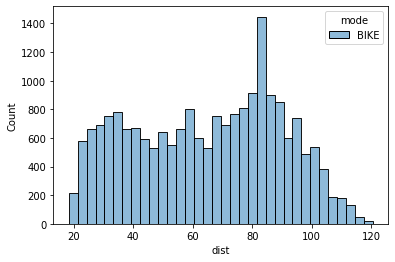

In [11]:
sns.histplot(data=failed_od, x='dist', hue='mode')